## OMEGA-MAPPIN - Map Comparisons

This notebook runs through the analysis comparing different data types. 

Maps are all put into the same space - the 7500 vertices of the template brain. 
- Oscs, slopes, genes and terms are defined for each vertex.
- Anat is defined over ROIs

Data types availabe: electrophys (oscillations and slopes), genes, terms, and anatomical. 

In [1]:
# Import required libraries
import sys
import os

# Import custom code from module om, and OO code for handling data
sys.path.append('/Users/thomasdonoghue/Documents/GitCode/omegamappin/')
from om.gen import *                    # Import general code 
from om.cl.mc import *                  # Import Map-Comp classes
from om.plts.mc_plts import *           # Import Map-Comp Plots
from om.cl.md import *                  # Import Meg-Data classes

# Set plots to display inline
%matplotlib inline

In [2]:
# Initialize MapComp object and oscillatory bands list
db = OMDB()
om_maps = MapComp(db)

In [3]:
# Check files that are available
om_maps.check_files()

Oscillation Files:
 Group_Osc_Scores.npz
Group_Osc_Scores_OLD.npz 

Slope Files:
 Group_Slopes.npz 

Terms Files:
 all_terms_r10_gaussian_estimation.csv
all_terms_r5_gaussian_estimation.csv
ns_terms.csv 

Genes Files:
 real_gene_names.csv
sub1_gene_estimations
sub2_gene_estimations
sub3_gene_estimations
sub4_gene_estimations
sub5_gene_estimations
sub6_gene_estimations 



In [4]:
# Load oscillation maps - here using the oscillation scores
om_maps.load_meg_maps(osc_file='Group_Osc_Scores', slope_file='Group_Slopes')

# Get osc bands used
#osc_bands = ['Theta', 'Alpha', 'Beta', 'LowGamma']
# osc_bands = om_maps.bands.keys() ?

### FUNCTION ANALYSIS

Function data all stems from the NeuroSynth meta-analytic tool for fMRI data. 

NeuroSynth does textual analysis on fMRI papers, and weights cognitive terms to anatomical locations reported in the paper. Here, we estimate the loading for each term at each of our cortical locations. We can them compare which cognitive terms, relating to function, correlate with electrophysiological signals. 

In [5]:
# Load term maps - here using 10 mm spatial estimation
om_maps.load_term_maps('all_terms_r10_gaussian_estimation.csv')

In [6]:
om_maps.calc_corrs('Terms', 'Alpha', method='parallel')

Calculating corrs between Terms and Alpha
importing numpy on engine(s)
importing pearsonr from scipy.stats.stats on engine(s)


In [6]:
# Calculate the correlation between oscillation maps and terms
for osc in osc_bands:
    om_maps.calc_corrs('Terms', osc)

Calculating corrs between Terms and Theta
Calculating corrs between Terms and Alpha
Calculating corrs between Terms and Beta
Calculating corrs between Terms and LowGamma


In [7]:
# Print out highest correlated terms for each oscillation band
for osc in osc_bands:
    om_maps.check_corrs('Terms', osc)



Correlations for  Terms  &   Theta : 

# 	 Terms                          	 R-Vals 	 P-vals 

1 	 pole                           	 0.35708 	 2.1569e-224
2 	 temporal pole                  	 0.35585 	 9.3639e-223
3 	 dementia                       	 0.35566 	 1.6675e-222
4 	 frontotemporal                 	 0.34368 	 6.0239e-207
5 	 progression                    	 0.33698 	 1.5361e-198
6 	 degeneration                   	 0.31691 	 1.3598e-174
7 	 atrophy                        	 0.31527 	 1.0255e-172
8 	 alzheimer disease              	 0.31013 	 6.7122e-167
9 	 voxel morphometry              	 0.30716 	 1.3439e-163
10 	 morphometry                    	 0.30429 	 1.9014e-160
11 	 alzheimer                      	 0.29945 	 3.3264e-155
12 	 t1                             	 0.27480 	 4.8429e-130
13 	 volume                         	 0.27112 	 1.6753e-126
14 	 personality                    	 0.26285 	 9.4690e-119
15 	 disorder                       	 0.26210 	 4.6334e-118
16 	 disease 

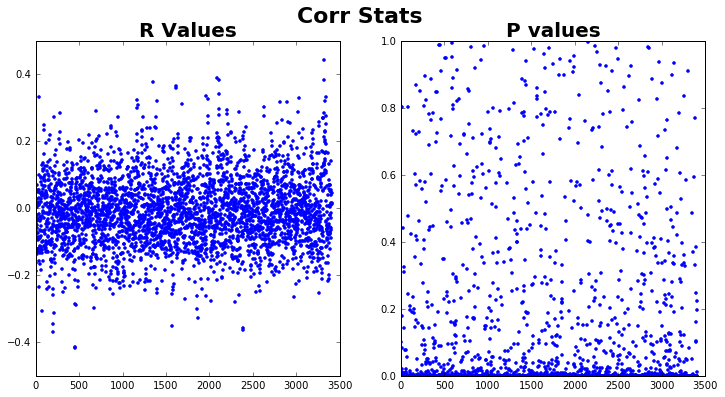

In [8]:
# Plot distribution of R and p-values
plot_dat = 'TermsAlpha'
plot_corrs(om_maps.corrs[plot_dat], om_maps.p_vals[plot_dat])

In [9]:
# Save calculated osc correlations to file
for osc in osc_bands:
    om_maps.save_corrs('Terms', osc, save_as_npz=True, save_as_csv=True)

In [10]:
# Calculate correlations with slopes
om_maps.calc_corrs('Terms', 'Slopes')

Calculating corrs between Terms and Slopes


In [11]:
# Check the correlations between term values and slope values
om_maps.check_corrs('Terms', 'Slopes')



Correlations for  Terms  &   Slopes : 

# 	 Terms                          	 R-Vals 	 P-vals 

1 	 visual                         	 0.48674 	 0.0000e+00
2 	 occipital                      	 0.40642 	 2.6131e-296
3 	 intraparietal                  	 0.38475 	 3.3925e-263
4 	 intraparietal sulcus           	 0.38265 	 4.1054e-260
5 	 vision                         	 0.37377 	 2.4504e-247
6 	 visual cortex                  	 0.36178 	 1.0010e-230
7 	 motion                         	 0.36120 	 6.2273e-230
8 	 occipital cortex               	 0.35630 	 2.3653e-223
9 	 spatial                        	 0.34985 	 7.1412e-215
10 	 visuo                          	 0.34856 	 3.2962e-213
11 	 object                         	 0.34740 	 1.0372e-211
12 	 primary visual                 	 0.33915 	 3.0589e-201
13 	 precuneus                      	 0.32873 	 1.7764e-188
14 	 extrastriate                   	 0.32702 	 2.0075e-186
15 	 visual attention               	 0.32455 	 1.7167e-183
16 	 sulcus i

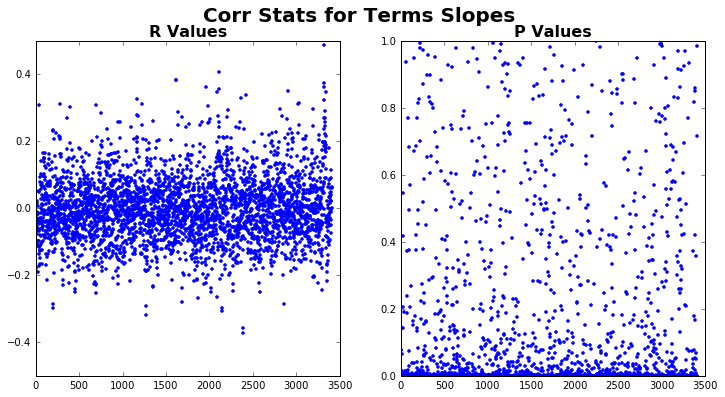

In [12]:
# Plot correlation R- and p-vals between terms & slopes
om_maps.plot_corrs('Terms', 'Slopes')

In [13]:
# Save out correlations between terms and slopes
om_maps.save_corrs('Terms', 'Slopes')

In [14]:
# Unload terms - terms & genes are quite large. Unload terms since no longer needed.
om_maps.unload_data('Terms')

### GENE ANALYSIS

Genetic expression data is taken from the Allen Brain Human Brain Atlas. 

First we use their data to estimate gene expression at our cortical locations. We then check which genes correlate with our electrophysiological data. 

In [27]:
# Load gene files
om_maps.load_gene_maps('sub6')

Loading file # 1  of  3
Loading file # 2  of  3
Loading file # 3  of  3
All files loaded!


In [28]:
# Calculate the correlation between oscillation maps and genes
for osc in osc_bands:
    om_maps.calc_corrs('Genes', osc)

Calculating corrs between Genes  and  Theta
Calculating corrs between Genes  and  Alpha
Calculating corrs between Genes  and  Beta
Calculating corrs between Genes  and  LowGamma


In [29]:
# Print out highest correlated genes for each oscillation band
for osc in osc_bands:
    om_maps.check_corrs('Genes', osc)



Correlations for  Genes  &   Theta : 

# 	 Genes                                                   	 R-Vals 	 P-vals 

1 	 laminin, alpha 2                                        	 0.37283 	 1.1393e-80
2 	 glutamate-ammonia ligase                                	 0.34741 	 1.3651e-69
3 	 clusterin                                               	 0.34579 	 6.3645e-69
4 	 transferrin receptor                                    	 0.33565 	 8.3997e-65
5 	 chordin-like 1                                          	 0.33508 	 1.4161e-64
6 	 stimulator of chondrogenesis 1                          	 0.33365 	 5.2282e-64
7 	 glutamic pyruvate transaminase (alanine aminotrans      	 0.32954 	 2.1501e-62
8 	 zinc finger, FYVE domain containing 21                  	 0.32924 	 2.7898e-62
9 	 phospholipase C, eta 1                                  	 0.32650 	 3.2202e-61
10 	 isocitrate dehydrogenase 2 (NADP+), mitochondrial       	 0.32446 	 1.9456e-60
11 	 G protein-coupled receptor 20              

In [30]:
# Save calculated correlations to file
for osc in osc_bands:
    om_maps.save_corrs('Genes', osc, save_as_npz=True, save_as_csv=True)

In [31]:
# Calculate the correlation between slopes and genes
om_maps.calc_corrs('Genes', 'Slopes')

Calculating corrs between Genes  and  Slopes


In [32]:
# Print out the highest correlated genes for slopes
om_maps.check_corrs('Genes', 'Slopes')



Correlations for  Genes  &   Slopes : 

# 	 Genes                                                   	 R-Vals 	 P-vals 

1 	 latexin                                                 	 0.37621 	 3.1980e-82
2 	 lymphocyte-activation gene 3                            	 0.37191 	 2.9910e-80
3 	 estrogen-related receptor gamma                         	 0.35933 	 1.1620e-74
4 	 tetratricopeptide repeat domain 21B                     	 0.33425 	 3.0315e-64
5 	 coiled-coil domain containing 89                        	 0.33108 	 5.3388e-63
6 	 glycosylphosphatidylinositol specific phospholipas      	 0.31992 	 1.0221e-58
7 	 aldehyde oxidase 1                                      	 0.31648 	 1.9734e-57
8 	 KIAA1875                                                	 0.31644 	 2.0369e-57
9 	 ring finger protein 148                                 	 0.31583 	 3.4143e-57
10 	 Kruppel-like factor 9                                   	 0.31564 	 4.0402e-57
11 	 collagen, type V, alpha 1                 

In [33]:
# Save calculated correlations to file
om_maps.save_corrs('Genes', 'Slopes', save_as_npz=True, save_as_csv=True)

### ANATOMY ANALYSIS

Anatomical data comes open data projects such as the HCP and is processed by the Verstynen lab at CMU. 

Anatomical connectivity data uses a Region-Of-Interest (ROI) analyses, in which the level of connectivity between cortical regions is inferred from DTI data. 

In order to compare, MEG data is first collapsed into the same ROIs, for comparison. We then compare whether the structural connectivity relates to the covariation of electrophysiological parameters across the cortex. 

In [4]:
# Initiliaze Map Comp object in ROI space
om_ROI_maps = MapCompROI(db)

In [5]:
# Load MEG oscillation & slope data
om_ROI_maps.load_meg_maps(osc_file='Group_Osc_Scores_OLD')

In [6]:
# Load MEG ROIs
elec_roi_path = '/Users/thomasdonoghue/Desktop/scout_Desikan-Killiany_68.mat'
om_ROI_maps.load_elec_rois(elec_roi_path)

In [7]:
# Load anatomy data
om_ROI_maps.load_anat_maps('whole_brain_FreeSurferDKT_count.mat', 'count')
#om_ROI_maps.load_anat_maps('whole_brain_FreeSurferDKT_qa.mat', 'qa')

In [8]:
# Align ROIs from MEG & Anat
om_ROI_maps.align_rois()

In [9]:
# Convert MEG data into ROIs
om_ROI_maps.conv_meg_rois()

In [10]:
# Compare anatomical connectivity to MEG data
om_ROI_maps.comp_meg_anat(section='all')

Anatomical data used is:  count
Correlation between MEG and anatomical connectivity: 

Theta
    R value:  0.2562
    P value:  7.946e-29
Beta
    R value:  0.05995
    P value:  0.01032
LowGamma
    R value:  -0.01344
    P value:  0.5657
Alpha
    R value:  0.02901
    P value:  0.2148


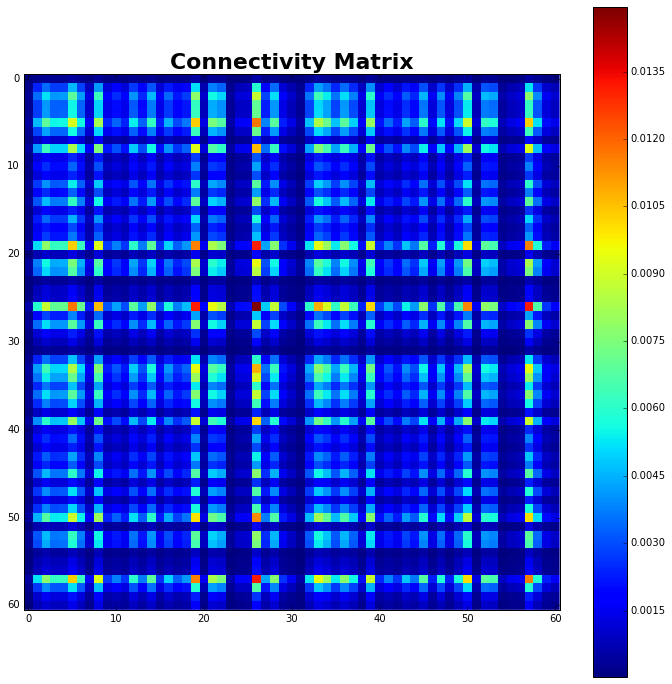

In [11]:
# Plot the connectivity matrix - for MEG data
osc_plot = 'Alpha'
plot_con_mat(om_ROI_maps.meg_con[osc_plot], 'all', om_ROI_maps.roi_lr)

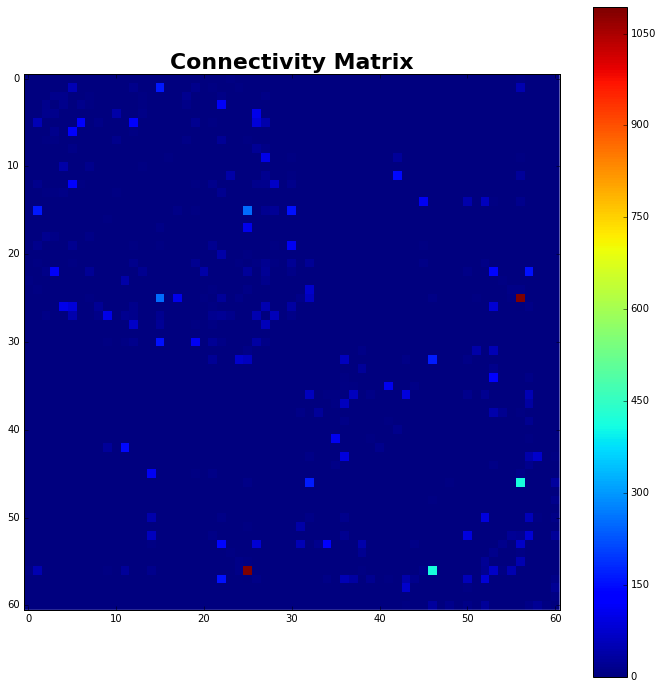

In [12]:
# Plot the connectivity matrix - for anatomical data
plot_con_mat(om_ROI_maps.anat_con, 'all', om_ROI_maps.roi_lr)